## Importing Libraires

In [3]:
!pip install yellowbrick
!pip install missingno
!pip install cliffs_delta

## Loading Data & Data Overview

In [1]:
# import libraries
import pandas as pd
# use the following to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower, TTestPower

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None






# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.stats import outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as stats
from cliffs_delta import cliffs_delta
import missingno as msno
from yellowbrick.regressor import ResidualsPlot

from sklearn.preprocessing import RobustScaler
from sklearn import linear_model
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## EDA

In [2]:
merchants = pd.read_csv('merchants.csv')
merchants.head()
merchants.describe(include='all')
merchants.shape

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057,-0.057,N,E,E,-0.400,...,-2.250,18.667,6,-2.320,13.917,12,N,242,9,1.000
1,M_ID_9339d880ad,3184,840,20,-0.057,-0.057,N,E,E,-0.720,...,-0.740,1.292,6,-0.570,1.688,12,N,22,16,1.000
2,M_ID_e726bbae1e,447,690,1,-0.057,-0.057,N,E,E,-82.130,...,-82.130,260.000,2,-82.130,260.000,2,N,-1,5,5.000
3,M_ID_a70e9c5f81,5026,792,9,-0.057,-0.057,Y,E,E,NaN,...,NaN,4.667,6,NaN,3.833,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057,-0.057,Y,E,E,NaN,...,NaN,0.361,6,NaN,0.347,12,Y,-1,-1,NaN


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
count,334696,334696.000,334696.000,334696.000,334696.000,334696.000,334696,334696,334696,334683.000,...,334683.000,334696.000,334696.000,334683.000,334696.000,334696.000,334696,334696.000,334696.000,322809.000
unique,334633,NaN,NaN,NaN,NaN,NaN,2,5,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,M_ID_42697d5d44,NaN,NaN,NaN,NaN,NaN,N,E,E,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN,327657,177104,175309,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,238596,NaN,NaN,NaN
mean,NaN,31028.736,423.132,25.116,0.011,0.008,NaN,NaN,NaN,13.833,...,21.651,inf,5.947,25.228,inf,11.599,NaN,102.918,11.861,2.380
std,NaN,31623.043,252.898,9.807,1.098,1.070,NaN,NaN,NaN,2395.490,...,3947.108,NaN,0.395,5251.842,NaN,1.520,NaN,107.091,6.177,1.563
min,NaN,1.000,-1.000,-1.000,-0.057,-0.057,NaN,NaN,NaN,-82.130,...,-82.130,0.167,1.000,-82.130,0.098,1.000,NaN,-1.000,-1.000,1.000
25%,NaN,3612.000,222.000,19.000,-0.057,-0.057,NaN,NaN,NaN,0.880,...,0.850,0.902,6.000,0.850,0.898,12.000,NaN,-1.000,9.000,1.000
50%,NaN,19900.000,373.000,27.000,-0.057,-0.057,NaN,NaN,NaN,1.000,...,1.010,1.027,6.000,1.020,1.043,12.000,NaN,69.000,9.000,2.000
75%,NaN,51707.250,683.000,33.000,-0.048,-0.048,NaN,NaN,NaN,1.160,...,1.230,1.216,6.000,1.290,1.266,12.000,NaN,182.000,16.000,4.000


(334696, 22)

In [4]:
merchants.dtypes
print('**************')
merchants.info()
print('**************')
merchants.nunique()
print('**************')
merchants.isna().sum()

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

**************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-nul

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3372
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4507
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5009
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

**************


merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [5]:
merchants['category_1'].value_counts()

N    327657
Y      7039
Name: category_1, dtype: int64

In [6]:
merchants['most_recent_sales_range'].value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

In [7]:
merchants['category_2'].value_counts()

1.000    160888
5.000     52923
3.000     51887
4.000     36450
2.000     20661
Name: category_2, dtype: int64

In [8]:
merchants['category_4'].value_counts()

N    238596
Y     96100
Name: category_4, dtype: int64

In [9]:
merchants['most_recent_purchases_range'].value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

In [10]:
merchants['active_months_lag12'].value_counts()

12    305101
11      4449
10      4143
9       3824
8       3756
7       3274
6       2737
5       2276
4       2050
3       1652
2        896
1        538
Name: active_months_lag12, dtype: int64

In [11]:
merchants['active_months_lag3'].value_counts()

3    333262
2       896
1       538
Name: active_months_lag3, dtype: int64

<AxesSubplot:>

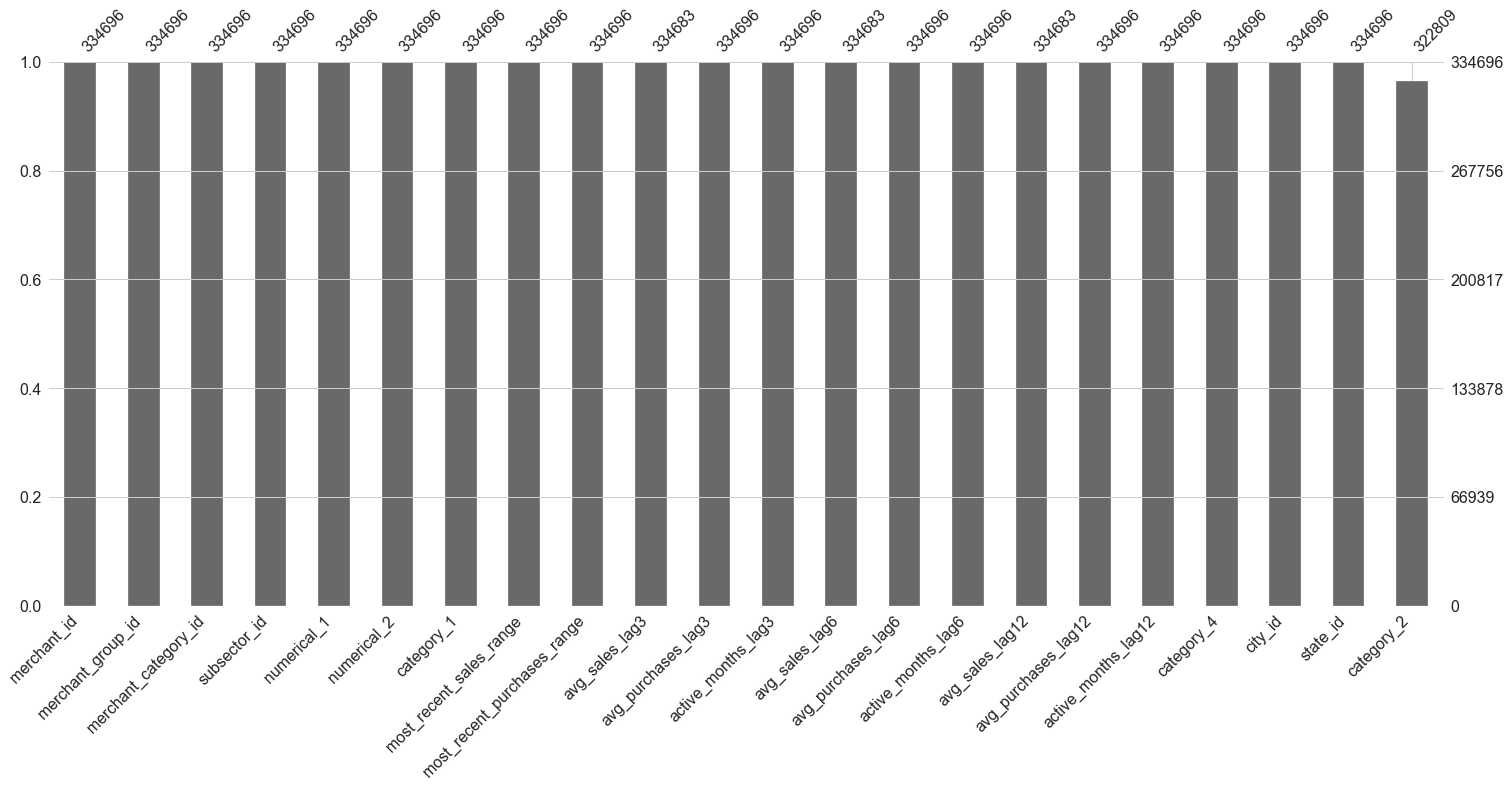

In [12]:
# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(merchants)

<AxesSubplot:>

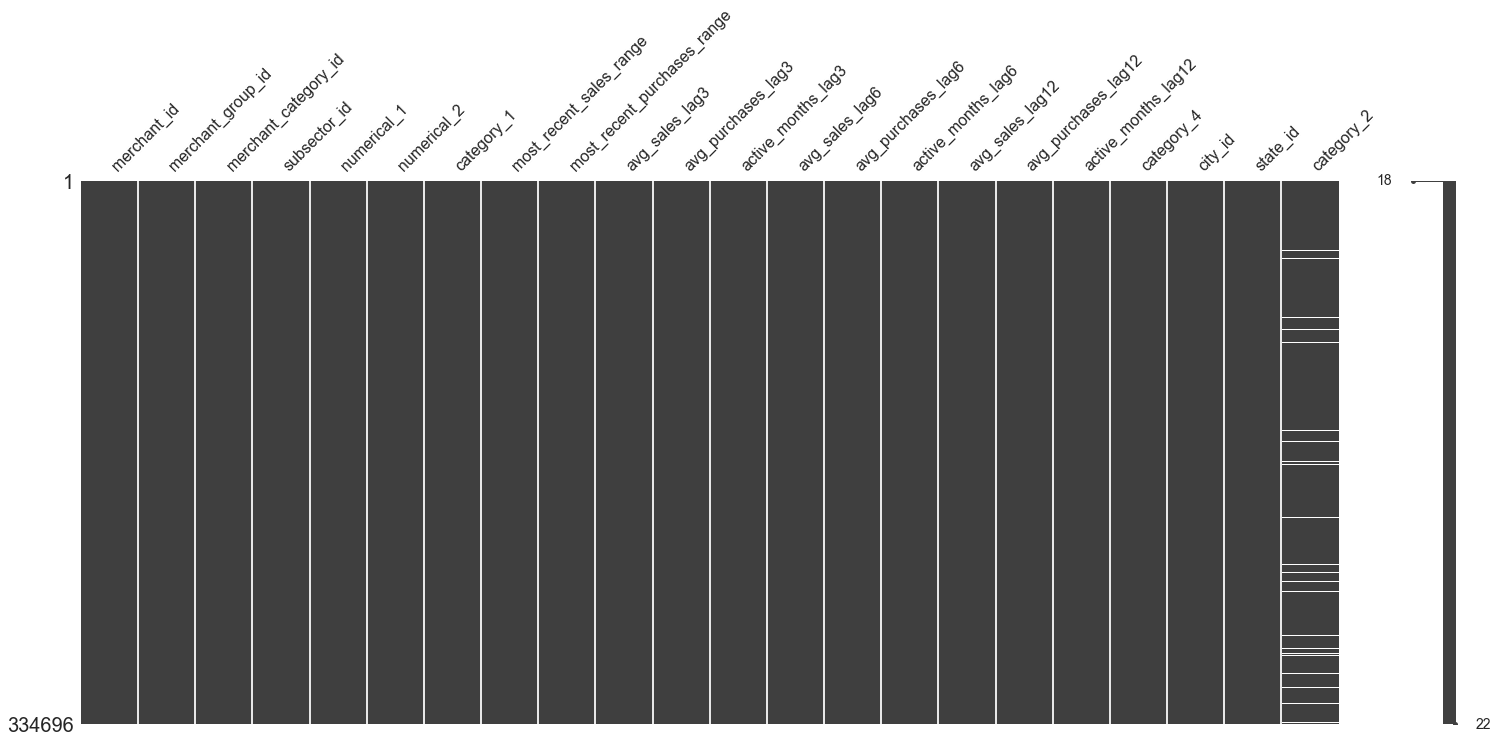

In [13]:
msno.matrix(merchants)

In [3]:
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')
new_merchant_transactions.head()
new_merchant_transactions.describe(include="all")
new_merchant_transactions.shape

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.558,2018-03-11 14:57:36,1.000,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.570,2018-03-19 18:53:37,1.000,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551,2018-04-26 14:08:44,1.000,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.672,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.660,2018-03-22 21:07:53,NaN,-1,29


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,1963031,1963031,1963031.000,1963031,1963031.000,1907109,1963031.000,1936815,1963031.000,1963031.000,1963031,1851286.000,1963031.000,1963031.000
unique,1,290001,NaN,2,NaN,3,NaN,226129,NaN,NaN,1667025,NaN,NaN,NaN
top,Y,C_ID_b7ebee6539,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-18 00:00:00,NaN,NaN,NaN
freq,1963031,109,NaN,1899935,NaN,922244,NaN,23018,NaN,NaN,582,NaN,NaN,NaN
mean,NaN,NaN,134.387,NaN,0.683,NaN,430.970,NaN,1.477,-0.551,NaN,2.198,10.881,25.976
std,NaN,NaN,101.515,NaN,1.584,NaN,246.339,NaN,0.499,0.694,NaN,1.528,6.039,10.129
min,NaN,NaN,-1.000,NaN,-1.000,NaN,-1.000,NaN,1.000,-0.747,NaN,1.000,-1.000,-1.000
25%,NaN,NaN,69.000,NaN,0.000,NaN,278.000,NaN,1.000,-0.717,NaN,1.000,9.000,19.000
50%,NaN,NaN,110.000,NaN,1.000,NaN,367.000,NaN,1.000,-0.675,NaN,1.000,9.000,29.000
75%,NaN,NaN,212.000,NaN,1.000,NaN,683.000,NaN,2.000,-0.582,NaN,3.000,15.000,34.000


(1963031, 14)

In [ ]:
new_merchant_transactions.dtypes
print('**************')
new_merchant_transactions.info()
print('**************')
new_merchant_transactions.nunique()
print('**************')
new_merchant_transactions.isna().sum()

In [4]:
historical_transactions = pd.read_csv('historical_transactions.csv')
historical_transactions.head()
historical_transactions.describe(include="all")
historical_transactions.shape

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,29112361,29112361,29112361.000,29112361,29112361.000,28934202,29112361.000,28973880,29112361.000,29112361.000,29112361,26459497.000,29112361.000,29112361.000
unique,2,325540,NaN,2,NaN,3,NaN,326311,NaN,NaN,16395300,NaN,NaN,NaN
top,Y,C_ID_3d3dfdc692,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,26595452,5582,NaN,27028332,NaN,15411747,NaN,1115097,NaN,NaN,26184,NaN,NaN,NaN
mean,NaN,NaN,129.326,NaN,0.648,NaN,481.013,NaN,-4.487,0.036,NaN,2.195,10.567,26.848
std,NaN,NaN,104.256,NaN,2.796,NaN,249.376,NaN,3.589,1123.522,NaN,1.532,6.367,9.693
min,NaN,NaN,-1.000,NaN,-1.000,NaN,-1.000,NaN,-13.000,-0.747,NaN,1.000,-1.000,-1.000
25%,NaN,NaN,53.000,NaN,0.000,NaN,307.000,NaN,-7.000,-0.720,NaN,1.000,9.000,19.000
50%,NaN,NaN,90.000,NaN,0.000,NaN,454.000,NaN,-4.000,-0.688,NaN,1.000,9.000,29.000
75%,NaN,NaN,212.000,NaN,1.000,NaN,705.000,NaN,-2.000,-0.603,NaN,3.000,16.000,34.000


(29112361, 14)

In [ ]:
historical_transactions.dtypes
print('**************')
historical_transactions.info()
print('**************')
historical_transactions.nunique()
print('**************')
historical_transactions.isna().sum()

In [5]:
# Merge merchants with historical transactions and new merchant transactions on the merchant ID
merged_transactions = pd.concat([historical_transactions, new_merchant_transactions])

In [17]:
merged_transactions.head()
merged_transactions.describe(include="all")
merged_transactions.shape

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703,2017-06-25 15:33:07,1.000,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733,2017-07-15 12:10:45,1.000,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720,2017-08-09 22:04:29,1.000,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735,2017-09-02 10:06:26,1.000,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.723,2017-03-10 01:14:19,1.000,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
count,31075392,31075392,31075392.000,31075392,31075392.000,30841311,31075392.000,30910695,31075392.000,31075392.000,31075392,28310783.000,31075392.000,31075392.000
unique,2,325540,NaN,2,NaN,3,NaN,334633,NaN,NaN,17717516,NaN,NaN,NaN
top,Y,C_ID_3d3dfdc692,NaN,N,NaN,A,NaN,M_ID_00a6ca8a8a,NaN,NaN,2017-11-24 00:00:00,NaN,NaN,NaN
freq,28558483,5582,NaN,28928267,NaN,16333991,NaN,1138115,NaN,NaN,26727,NaN,NaN,NaN
mean,NaN,NaN,129.645,NaN,0.651,NaN,477.852,NaN,-4.111,-0.001,NaN,2.195,10.587,26.793
std,NaN,NaN,104.093,NaN,2.735,NaN,249.482,NaN,3.766,1087.456,NaN,1.532,6.347,9.723
min,NaN,NaN,-1.000,NaN,-1.000,NaN,-1.000,NaN,-13.000,-0.747,NaN,1.000,-1.000,-1.000
25%,NaN,NaN,53.000,NaN,0.000,NaN,302.000,NaN,-7.000,-0.720,NaN,1.000,9.000,19.000
50%,NaN,NaN,90.000,NaN,0.000,NaN,454.000,NaN,-3.000,-0.688,NaN,1.000,9.000,29.000
75%,NaN,NaN,212.000,NaN,1.000,NaN,705.000,NaN,-1.000,-0.601,NaN,3.000,16.000,34.000


(31075392, 14)

In [18]:
merged_transactions.dtypes
print('**************')
merged_transactions.info()
print('**************')
merged_transactions.nunique()
print('**************')
merged_transactions.isna().sum()      

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

**************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31075392 entries, 0 to 1963030
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   authorized_flag       object 
 1   card_id               object 
 2   city_id               int64  
 3   category_1            object 
 4   installments          int64  
 5   category_3            object 
 6   merchant_category_id  int64  
 7   merchant_id           object 
 8   month_lag             int64  
 9   purchase_amount       float64
 10  purchase_date         object 
 11  category_2            float64
 12  state_id              int64  
 13  subsector_id          int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 3.5+ GB
**************


authorized_flag                2
card_id                   325540
city_id                      308
category_1                     2
installments                  15
category_3                     3
merchant_category_id         331
merchant_id               334633
month_lag                     16
purchase_amount           221246
purchase_date           17717516
category_2                     5
state_id                      25
subsector_id                  41
dtype: int64

**************


authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

In [19]:
merged_transactions['category_1'].value_counts()

N    28928267
Y     2147125
Name: category_1, dtype: int64

In [20]:
merged_transactions['category_2'].value_counts()

1.000    16235441
3.000     4201320
5.000     3985181
4.000     2796643
2.000     1092198
Name: category_2, dtype: int64

In [21]:
merged_transactions['category_3'].value_counts()

A    16333991
B    12513700
C     1993620
Name: category_3, dtype: int64

In [22]:
merged_transactions['authorized_flag'].value_counts()

Y    28558483
N     2516909
Name: authorized_flag, dtype: int64

<AxesSubplot:>

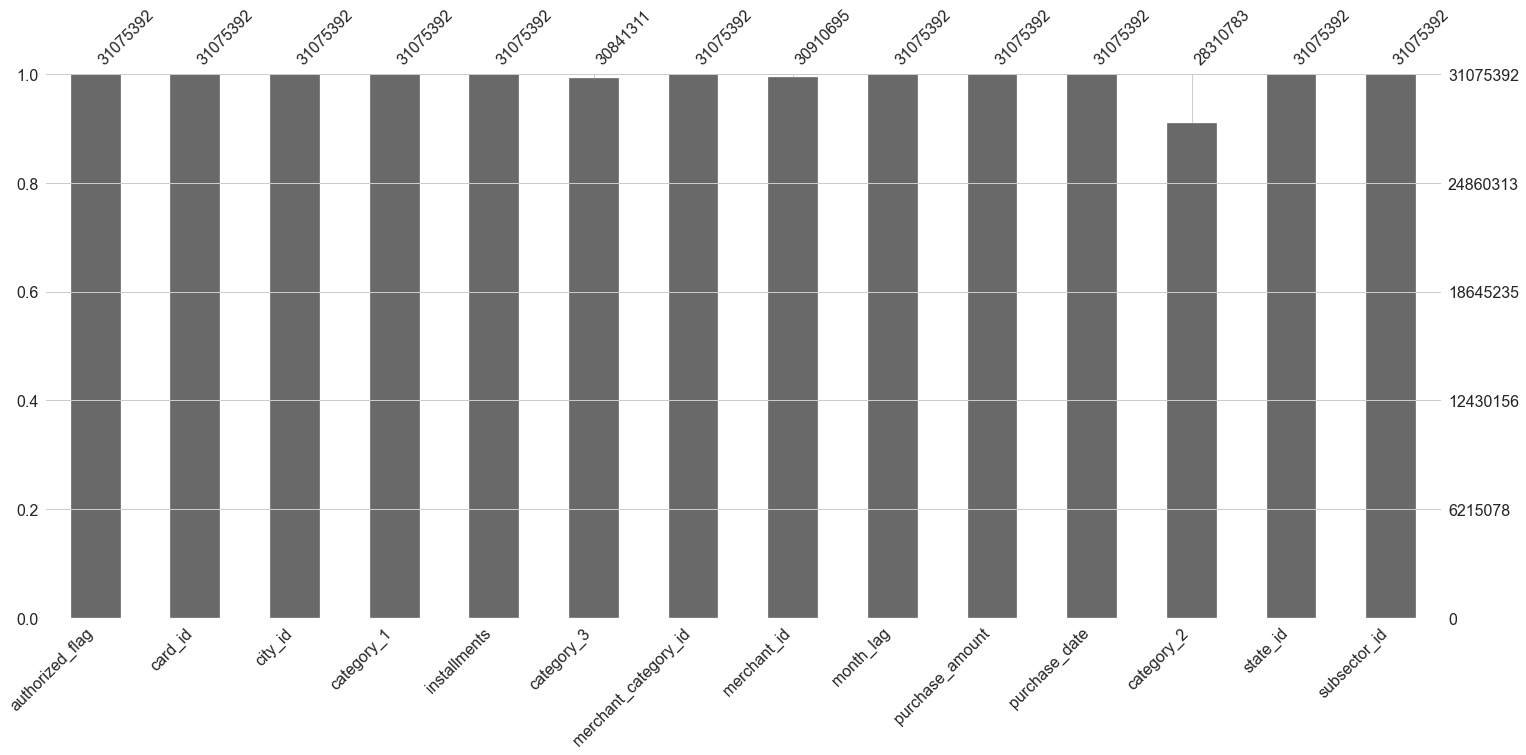

In [23]:
# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(merged_transactions)

<AxesSubplot:>

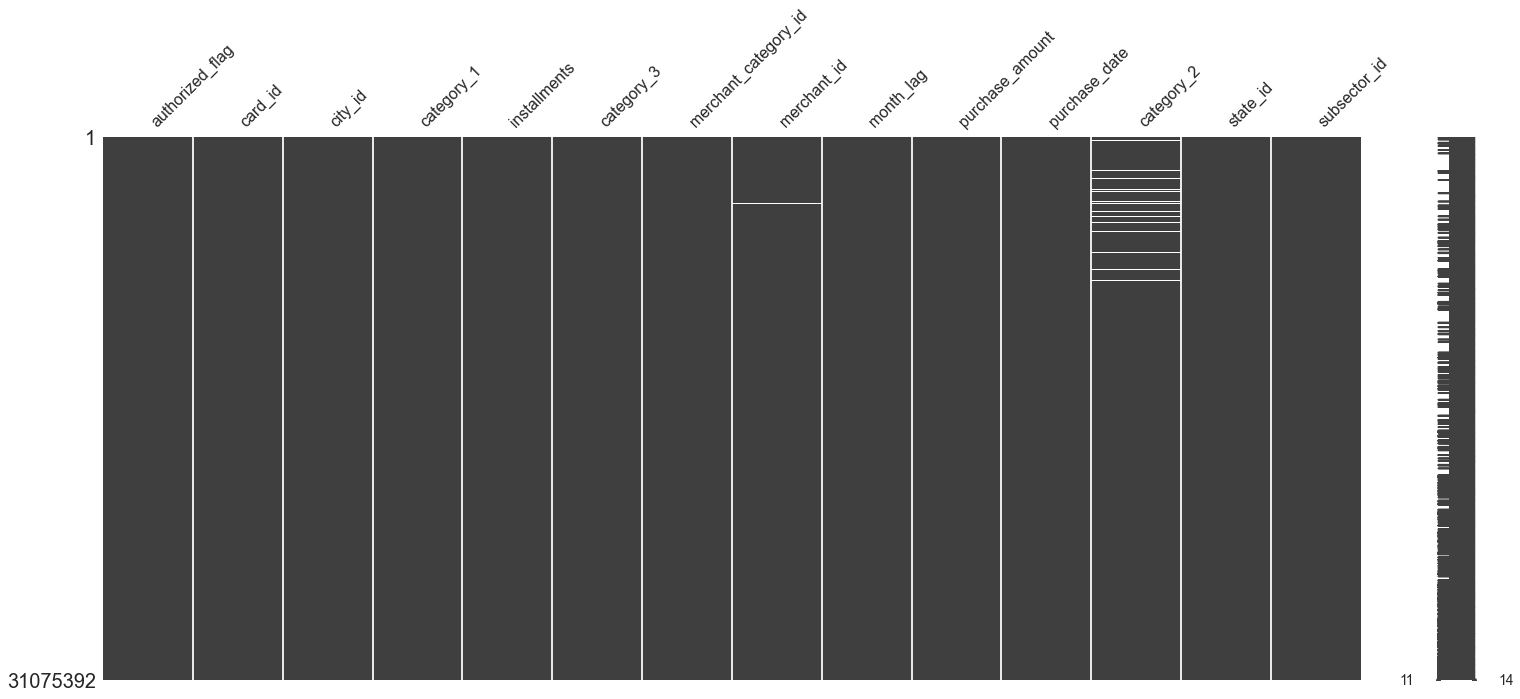

In [6]:
msno.matrix(merged_transactions)

In [7]:
userscore = pd.read_csv('userscore.csv')
userscore.head()
userscore.describe(include="all")
userscore.shape

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820
1,C_ID_3d0044924f,Jan-17,4,1,0,0.393
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.160


,card_id,first_active_month,feature_1,feature_2,feature_3,score
count,201917,201917,201917.000,201917.000,201917.000,201917.000
unique,201917,75,NaN,NaN,NaN,NaN
top,C_ID_92a2005557,Sep-17,NaN,NaN,NaN,NaN
freq,1,13878,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.105,1.745,0.566,-0.394
std,NaN,NaN,1.186,0.751,0.496,3.850
min,NaN,NaN,1.000,1.000,0.000,-33.219
25%,NaN,NaN,2.000,1.000,0.000,-0.883
50%,NaN,NaN,3.000,2.000,1.000,-0.023
75%,NaN,NaN,4.000,2.000,1.000,0.765


(201917, 6)

In [27]:
userscore.dtypes
print('**************')
userscore.info()
print('**************')
userscore.nunique()
print('**************')
userscore.isna().sum()

card_id                object
first_active_month     object
feature_1               int64
feature_2               int64
feature_3               int64
score                 float64
dtype: object

**************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB
**************


card_id               201917
first_active_month        75
feature_1                  5
feature_2                  3
feature_3                  2
score                 197110
dtype: int64

**************


card_id               0
first_active_month    0
feature_1             0
feature_2             0
feature_3             0
score                 0
dtype: int64

<AxesSubplot:>

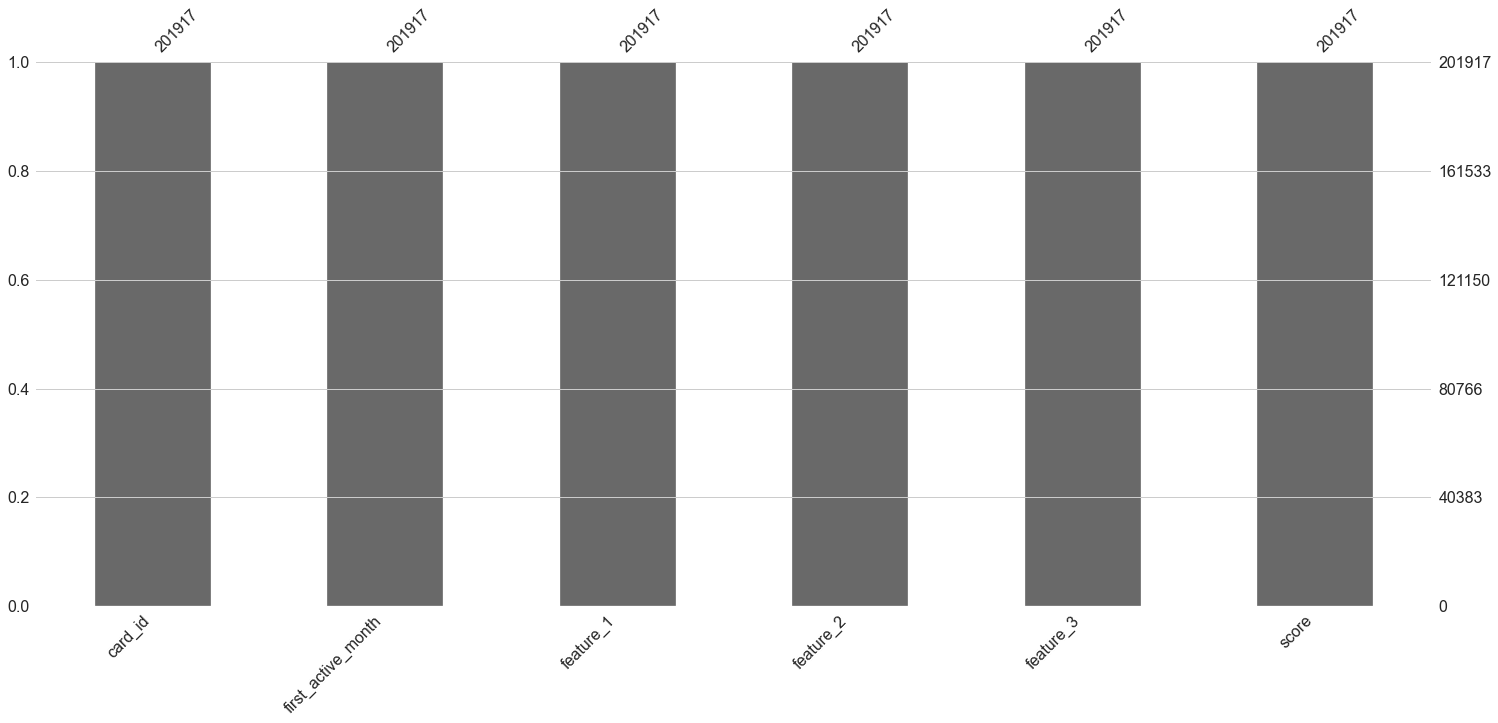

In [28]:
# visualize using msno package, no need in this case, just give for demo purpose.
msno.bar(userscore)

<AxesSubplot:>

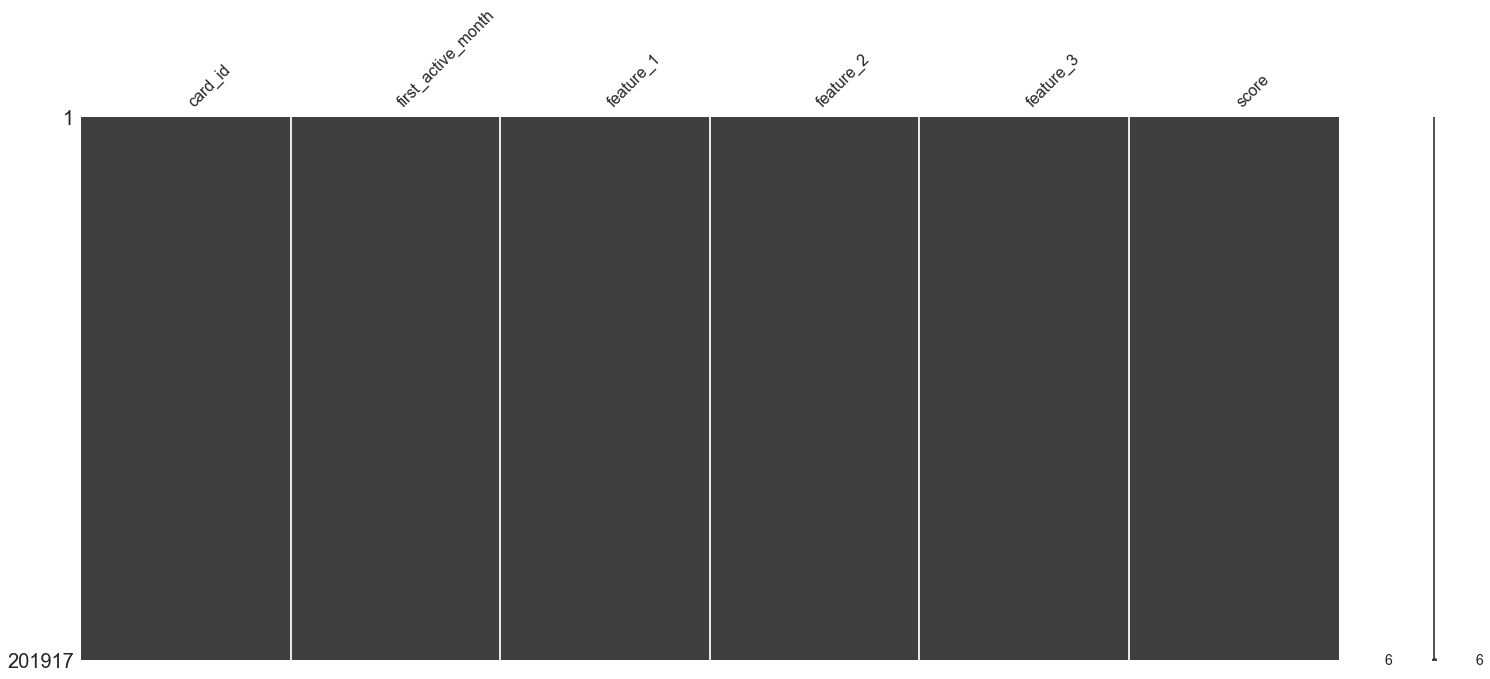

In [29]:
msno.matrix(userscore)

## Featrue Engineering 

#### Encoding inconsistence values

In [8]:
# replacing categorical values with numeric values
merchants['category_1'].replace(['Y', 'N'],[0, 1], inplace=True)

In [9]:
merchants['category_4'].replace(['Y', 'N'],[0, 1], inplace=True)

In [10]:
merchants['most_recent_purchases_range'].replace(['A', 'B', 'C', 'D', 'E'],[0, 1, 2, 3, 4], inplace=True)

In [11]:
merchants['most_recent_sales_range'].replace(['A', 'B', 'C', 'D', 'E'],[0, 1, 2, 3, 4], inplace=True)

In [12]:
# Replace infinite updated data with nan
merchants.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
merged_transactions['category_1'].replace(['Y', 'N'],[0, 1], inplace=True)

In [14]:
merged_transactions['category_3'].replace(['A', 'B', 'C'],[0, 1, 2], inplace=True)

In [15]:
merged_transactions['authorized_flag'].replace(['Y', 'N'],[0, 1], inplace=True)

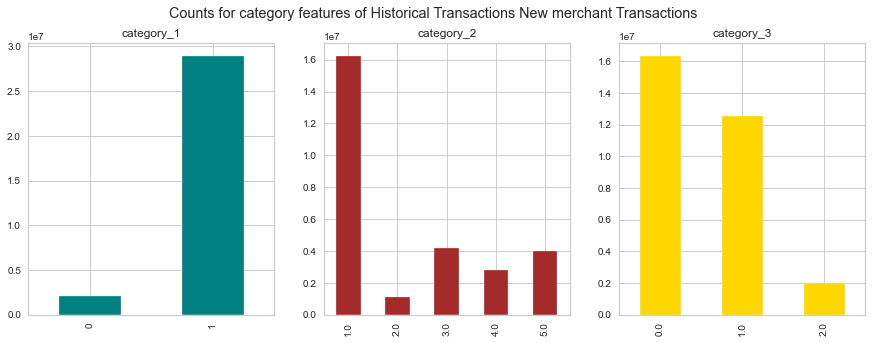

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merged_transactions['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1');
merged_transactions['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2');
merged_transactions['category_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_3');
plt.suptitle('Counts for category features of Historical Transactions New merchant Transactions');

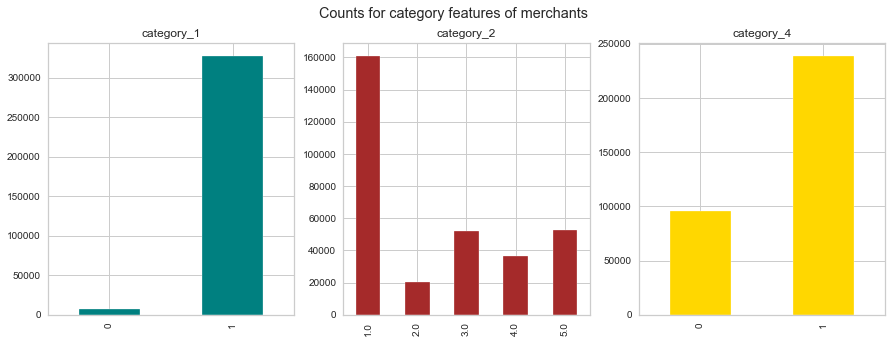

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5));
merchants['category_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='category_1');
merchants['category_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='category_2');
merchants['category_4'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='category_4');
plt.suptitle('Counts for category features of merchants');

In [18]:
# constructing the date time variable
merged_transactions['purchase_date'] = pd.to_datetime(merged_transactions['purchase_date'], format='%Y-%m-%d %H:%M:%S')

In [19]:
merged_transactions['purchase_year'] = merged_transactions['purchase_date'].dt.year.astype("int64")
merged_transactions['purchase_month'] = merged_transactions['purchase_date'].dt.month.astype("int64")
merged_transactions['purchase_day'] = merged_transactions['purchase_date'].dt.day.astype("int64")

# merged_transactions.drop(['purchase_date'],axis=1, inplace=True)

In [20]:
merged_transactions.dtypes

authorized_flag                  int64
card_id                         object
city_id                          int64
category_1                       int64
installments                     int64
category_3                     float64
merchant_category_id             int64
merchant_id                     object
month_lag                        int64
purchase_amount                float64
purchase_date           datetime64[ns]
category_2                     float64
state_id                         int64
subsector_id                     int64
purchase_year                    int64
purchase_month                   int64
purchase_day                     int64
dtype: object

In [21]:
merged_transactions['purchase_date']

0         2017-06-25 15:33:07
1         2017-07-15 12:10:45
2         2017-08-09 22:04:29
3         2017-09-02 10:06:26
4         2017-03-10 01:14:19
                  ...        
1963026   2018-04-06 14:36:52
1963027   2018-03-07 13:19:18
1963028   2018-03-05 12:04:56
1963029   2018-03-09 14:47:05
1963030   2018-04-11 07:59:46
Name: purchase_date, Length: 31075392, dtype: datetime64[ns]

In [22]:
merged_transactions['purchase_date'].dt.day

0          25
1          15
2           9
3           2
4          10
           ..
1963026     6
1963027     7
1963028     5
1963029     9
1963030    11
Name: purchase_date, Length: 31075392, dtype: int64

In [23]:
merged_transactions['purchase_day'].value_counts()

20    1103258
22    1074292
6     1073351
16    1070082
21    1067361
9     1064169
17    1062668
13    1059967
7     1057669
23    1056871
27    1046228
18    1044430
15    1043888
10    1039541
11    1039313
14    1038831
28    1031080
24    1030871
26    1009639
8     1003867
5      998331
19     982744
2      979285
4      975885
12     972020
25     958654
3      923646
29     916315
1      913255
30     845430
31     592451
Name: purchase_day, dtype: int64

In [24]:
merged_transactions.dtypes

authorized_flag                  int64
card_id                         object
city_id                          int64
category_1                       int64
installments                     int64
category_3                     float64
merchant_category_id             int64
merchant_id                     object
month_lag                        int64
purchase_amount                float64
purchase_date           datetime64[ns]
category_2                     float64
state_id                         int64
subsector_id                     int64
purchase_year                    int64
purchase_month                   int64
purchase_day                     int64
dtype: object

In [25]:
# Replace infinite updated data with nan
merged_transactions.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
userscore[['first_active_month', 'first_active_day']] = userscore['first_active_month'].str.split('-', 1, expand=True)

In [27]:
userscore['first_active_month'].value_counts()

Dec    22718
Nov    22403
Oct    21231
Aug    20552
Sep    20372
Jul    18490
Jun    15579
May    13953
Apr    12860
Jan    12050
Mar    11194
Feb    10515
Name: first_active_month, dtype: int64

In [28]:
userscore['first_active_day'].value_counts()

17    130519
16     51277
15     14142
14      4523
13      1129
12       282
18        35
11        10
Name: first_active_day, dtype: int64

In [29]:
userscore['first_active_day'].dtypes

dtype('O')

In [30]:
userscore['first_active_month'].dtypes

dtype('O')

In [31]:
userscore['first_active_day'] = pd.to_numeric(userscore['first_active_day'])

In [32]:
userscore['first_active_month'].replace(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Sep', 'Aug', 'Oct', 'Nov', 'Dec'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)

In [33]:
userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  int64  
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
 6   first_active_day    201917 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 10.8+ MB


In [34]:
userscore['first_active_month'].value_counts()

11    22718
10    22403
9     21231
8     20552
7     20372
6     18490
5     15579
4     13953
3     12860
0     12050
2     11194
1     10515
Name: first_active_month, dtype: int64

In [35]:
# Replace infinite updated data with nan
userscore.replace([np.inf, -np.inf], np.nan, inplace=True)

### Collinearity between variables : Variance Inflation Factor

In [36]:
feature_columns = ['feature_1','feature_2','feature_3']
features = userscore[feature_columns]

vif = pd.DataFrame()
vif["VIF_Factors"] = [variance_inflation_factor(features.iloc[:,:].values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF_Factors,features
0,5.752,feature_1
1,3.388,feature_2
2,3.391,feature_3


#### Observations :

* The VIF values for all the three features are well under 10. So, there is no problem of multicollinearity in the data .

### Check the normality ( The distribution) of the data & Detect Outliers 

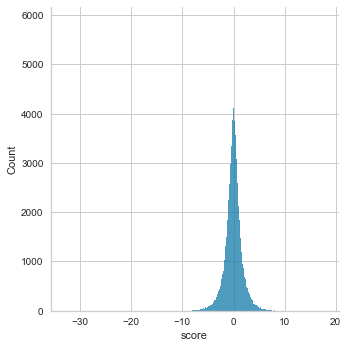

In [48]:
sns.displot(data=userscore, x=userscore['score'])

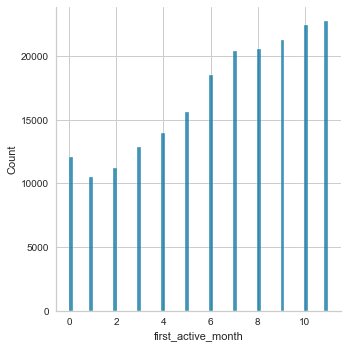

In [50]:
sns.displot(data=userscore, x=userscore['first_active_month'])

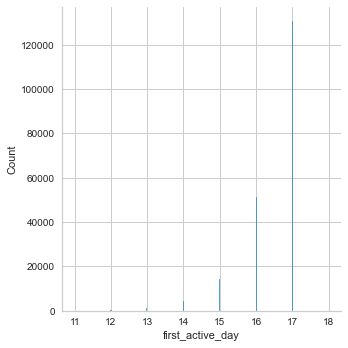

In [51]:
sns.displot(data=userscore, x=userscore['first_active_day'])

In [ ]:
# Create Distribution plot for all columns in userscore dataframe

# Loop through each column of the dataframe
for column in userscore.columns:
    # Plot the distribution of the column using seaborn
    sns.displot(data=userscore, x=column)

In [ ]:
# Create Distribution plot for all columns in merchants dataframe

# Loop through each column of the dataframe
for column in merchants.columns:
    # Plot the distribution of the column using seaborn
    sns.displot(data=merchants, x=column)

In [ ]:
# Create Distribution plot for all columns in merged_transactions dataframe

# Loop through each column of the dataframe
for column in merged_transactions.columns:
    # Plot the distribution of the column using seaborn
    sns.displot(data=merged_transactions, x=column)

#### OBSERVATION:
* Through the distribution shown above, we notice that:

Most of the time users use their credit card in the last months of the year, especially in the middle of the month, and this may result due to some seasons such as the Christmas season, for example, or something like that..

### Handeling Outliers

In [63]:
# Calculate the IQR for each column in the DataFrame
Q1 = userscore.quantile(0.25)
Q3 = userscore.quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in each column of the DataFrame
outliers = ((userscore < lower_bound) | (userscore > upper_bound)).any(axis=1)

outliers_values = userscore[(userscore < lower_bound) | (userscore > upper_bound)]
print(outliers_values)

       card_id  first_active_month  feature_1  feature_2  feature_3  score  \
0          NaN                 NaN        NaN        NaN        NaN    NaN   
1          NaN                 NaN        NaN        NaN        NaN    NaN   
2          NaN                 NaN        NaN        NaN        NaN    NaN   
3          NaN                 NaN        NaN        NaN        NaN    NaN   
4          NaN                 NaN        NaN        NaN        NaN    NaN   
...        ...                 ...        ...        ...        ...    ...   
201912     NaN                 NaN        NaN        NaN        NaN    NaN   
201913     NaN                 NaN        NaN        NaN        NaN    NaN   
201914     NaN                 NaN        NaN        NaN        NaN    NaN   
201915     NaN                 NaN        NaN        NaN        NaN -4.677   
201916     NaN                 NaN        NaN        NaN        NaN    NaN   

        first_active_day  
0                    NaN  
1        

C:\Users\lap1\AppData\Local\Temp/ipykernel_1084/2357373132.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((userscore < lower_bound) | (userscore > upper_bound)).any(axis=1)
C:\Users\lap1\AppData\Local\Temp/ipykernel_1084/2357373132.py:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_values = userscore[(userscore < lower_bound) | (userscore > upper_bound)]


In [61]:
outliers.value_counts()

False    181191
True      20726
dtype: int64

In [72]:
outliers_values.tail()

,card_id,first_active_month,feature_1,feature_2,feature_3,score,first_active_day
201912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201915,NaN,NaN,NaN,NaN,NaN,-4.677,NaN
201916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='score', ylabel='Count'>

Text(0.5, 1.0, 'Outliers Distribution')

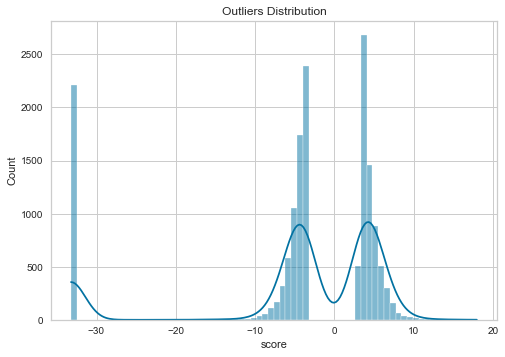

In [100]:
fig, ax = plt.subplots()
sns.histplot(outliers_values['score'], ax=ax, kde=True)
ax.set_title('Outliers Distribution')

#### OBSERVATION:
* There are many outliers that make another distribution so, remove these values will lead to biased model to spacific category of data.

### Handeling Null values

In [37]:
# Drop all the column from dataset
merchants.drop(['avg_sales_lag3'],axis=1, inplace=True)
merchants.drop(['avg_purchases_lag3'],axis=1, inplace=True)
merchants.drop(['active_months_lag3'],axis=1, inplace=True)
merchants.drop(['avg_sales_lag6'],axis=1, inplace=True)
merchants.drop(['avg_purchases_lag6'],axis=1, inplace=True)
merchants.drop(['active_months_lag6'],axis=1, inplace=True)

♦ We dropped these columns because they are repeated in "lag12" values

In [69]:
# Drop only null values
merchants['avg_sales_lag12'].dropna(inplace=True)
merchants['avg_purchases_lag12'].dropna(inplace = True)
merged_transactions['merchant_id'].dropna(inplace = True)

In [70]:
# Fill the Null values

# Calculate the mode value for the column
mode_value = merchants['category_2'].mode().iloc[0]

# Fill missing values with the mode value for the selected column
merchants['category_2'] = merchants['category_2'].fillna(mode_value)

mode_value = merged_transactions['category_2'].mode().iloc[0]
merged_transactions['category_2'] = merged_transactions['category_2'].fillna(mode_value)

mode_value = merged_transactions['category_3'].mode().iloc[0]
merged_transactions['category_3'] = merged_transactions['category_3'].fillna(mode_value)

In [71]:
merchants['category_2'].isna().sum()

0

In [72]:
 merged_transactions['category_2'].isna().sum()

0

In [73]:
 merged_transactions['category_3'].isna().sum()

0

In [74]:
merged_transactions.isna().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3                   0
merchant_category_id         0
merchant_id             164697
month_lag                    0
purchase_amount              0
purchase_date                0
category_2                   0
state_id                     0
subsector_id                 0
purchase_year                0
purchase_month               0
purchase_day                 0
dtype: int64

In [75]:
merchants.isna().sum()

merchant_id                     0
merchant_group_id               0
merchant_category_id            0
subsector_id                    0
numerical_1                     0
numerical_2                     0
category_1                      0
most_recent_sales_range         0
most_recent_purchases_range     0
avg_sales_lag12                13
avg_purchases_lag12             3
active_months_lag12             0
category_4                      0
city_id                         0
state_id                        0
category_2                      0
dtype: int64

In [68]:
merchants.isnull().sum().sum()

16

## Merging Datasets

In [236]:
# Merge merchants with historical transactions and new merchant transactions on the merchant ID
merged_data = pd.merge(merged_transactions, merchants, on='merchant_id')

In [77]:
merged_data.head()
merged_data.shape

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,category_1_y,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,0,C_ID_4e6213e9bc,88,1,0,0.000,80,M_ID_e020e9b302,-8,-0.703,...,1,0,0,1.190,1.157,12,0,88,16,1.000
1,0,C_ID_4e6213e9bc,88,1,0,0.000,80,M_ID_e020e9b302,-11,-0.723,...,1,0,0,1.190,1.157,12,0,88,16,1.000
2,0,C_ID_4e6213e9bc,88,1,0,0.000,80,M_ID_e020e9b302,-8,-0.742,...,1,0,0,1.190,1.157,12,0,88,16,1.000
3,0,C_ID_4e6213e9bc,88,1,0,0.000,80,M_ID_e020e9b302,-6,-0.745,...,1,0,0,1.190,1.157,12,0,88,16,1.000
4,0,C_ID_4e6213e9bc,88,1,0,0.000,278,M_ID_e020e9b302,-9,-0.727,...,1,0,0,1.190,1.157,12,0,88,16,1.000


(32163978, 32)

In [237]:
# Merge userscore with merged data on the card ID
final_data = pd.merge(userscore, merged_data, on='card_id')

In [79]:
final_data.head()
final_data.shape
final_data.describe(include = 'all')

,card_id,first_active_month,feature_1,feature_2,feature_3,score,first_active_day,authorized_flag,city_id_x,category_1_x,...,category_1_y,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,C_ID_92a2005557,5,5,2,1,-0.820,17,0,69,1,...,0,4,4,8.570,16.220,7,0,-1,-1,1.000
1,C_ID_92a2005557,5,5,2,1,-0.820,17,0,69,1,...,0,0,0,0.760,0.753,12,0,-1,-1,1.000
2,C_ID_92a2005557,5,5,2,1,-0.820,17,0,69,1,...,0,4,4,8.570,16.220,7,0,-1,-1,1.000
3,C_ID_92a2005557,5,5,2,1,-0.820,17,0,69,1,...,0,0,0,0.760,0.753,12,0,-1,-1,1.000
4,C_ID_92a2005557,5,5,2,1,-0.820,17,0,69,1,...,0,4,4,8.570,16.220,7,0,-1,-1,1.000


(19923436, 38)

C:\Users\lap1\AppData\Local\Temp/ipykernel_7804/1807985599.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  final_data.describe(include = 'all')


,card_id,first_active_month,feature_1,feature_2,feature_3,score,first_active_day,authorized_flag,city_id_x,category_1_x,...,category_1_y,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
count,19923436,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000,...,19923436.000,19923436.000,19923436.000,19917593.000,19923423.000,19923436.000,19923436.000,19923436.000,19923436.000,19923436.000
unique,201917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_ID_0cd2ce025c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.037,3.122,1.743,0.554,-0.456,16.437,0.081,127.042,0.931,...,0.833,1.644,1.577,107.830,14.325,11.769,0.472,85.418,9.713,2.038
std,NaN,3.421,1.262,0.711,0.497,3.585,0.775,0.273,102.840,0.254,...,0.373,1.356,1.333,9020.639,607.470,1.031,0.499,98.399,7.084,1.485
min,NaN,0.000,1.000,1.000,0.000,-33.219,11.000,0.000,-1.000,0.000,...,0.000,0.000,0.000,-82.130,0.098,1.000,0.000,-1.000,-1.000,1.000
25%,NaN,3.000,2.000,1.000,0.000,-0.809,16.000,0.000,57.000,1.000,...,1.000,0.000,0.000,0.930,0.961,12.000,0.000,-1.000,5.000,1.000


In [80]:
final_data.dtypes
print('**************')
final_data.info()
print('**************')
final_data.nunique()
print('**************')
final_data.isna().sum() 

card_id                                object
first_active_month                      int64
feature_1                               int64
feature_2                               int64
feature_3                               int64
score                                 float64
first_active_day                        int64
authorized_flag                         int64
city_id_x                               int64
category_1_x                            int64
installments                            int64
category_3                            float64
merchant_category_id_x                  int64
merchant_id                            object
month_lag                               int64
purchase_amount                       float64
purchase_date                  datetime64[ns]
category_2_x                          float64
state_id_x                              int64
subsector_id_x                          int64
purchase_year                           int64
purchase_month                    

**************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19923436 entries, 0 to 19923435
Data columns (total 38 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   card_id                      object        
 1   first_active_month           int64         
 2   feature_1                    int64         
 3   feature_2                    int64         
 4   feature_3                    int64         
 5   score                        float64       
 6   first_active_day             int64         
 7   authorized_flag              int64         
 8   city_id_x                    int64         
 9   category_1_x                 int64         
 10  installments                 int64         
 11  category_3                   float64       
 12  merchant_category_id_x       int64         
 13  merchant_id                  object        
 14  month_lag                    int64         
 15  purchase_amount              flo

card_id                          201917
first_active_month                   12
feature_1                             5
feature_2                             3
feature_3                             2
score                            197110
first_active_day                      8
authorized_flag                       2
city_id_x                           308
category_1_x                          2
installments                         15
category_3                            3
merchant_category_id_x              325
merchant_id                      313541
month_lag                            16
purchase_amount                  184345
purchase_date                  13082078
category_2_x                          5
state_id_x                           25
subsector_id_x                       41
purchase_year                         2
purchase_month                       12
purchase_day                         31
merchant_group_id                107781
merchant_category_id_y              320


**************


card_id                           0
first_active_month                0
feature_1                         0
feature_2                         0
feature_3                         0
score                             0
first_active_day                  0
authorized_flag                   0
city_id_x                         0
category_1_x                      0
installments                      0
category_3                        0
merchant_category_id_x            0
merchant_id                       0
month_lag                         0
purchase_amount                   0
purchase_date                     0
category_2_x                      0
state_id_x                        0
subsector_id_x                    0
purchase_year                     0
purchase_month                    0
purchase_day                      0
merchant_group_id                 0
merchant_category_id_y            0
subsector_id_y                    0
numerical_1                       0
numerical_2                 

In [238]:
final_data['avg_sales_lag12'].dropna(inplace = True)   #5843 null values
final_data['avg_purchases_lag12'].dropna(inplace = True)   #13  null values

In [239]:
final_data.dropna(inplace=True)

In [240]:
final_data.isna().sum().sum()

0

In [228]:
final_data.isna().sum() 

card_id                        0
first_active_month             0
feature_1                      0
feature_2                      0
feature_3                      0
score                          0
first_active_day               0
authorized_flag                0
city_id_x                      0
category_1_x                   0
installments                   0
category_3                     0
merchant_category_id_x         0
merchant_id                    0
month_lag                      0
purchase_amount                0
purchase_date                  0
category_2_x                   0
state_id_x                     0
subsector_id_x                 0
purchase_year                  0
purchase_month                 0
purchase_day                   0
merchant_group_id              0
merchant_category_id_y         0
subsector_id_y                 0
numerical_1                    0
numerical_2                    0
category_1_y                   0
most_recent_sales_range        0
most_recen

### Feature Engineering

In [241]:
list(final_data.columns)


['card_id',
 'first_active_month',
 'feature_1',
 'feature_2',
 'feature_3',
 'score',
 'first_active_day',
 'authorized_flag',
 'city_id_x',
 'category_1_x',
 'installments',
 'category_3',
 'merchant_category_id_x',
 'merchant_id',
 'month_lag',
 'purchase_amount',
 'purchase_date',
 'category_2_x',
 'state_id_x',
 'subsector_id_x',
 'purchase_year',
 'purchase_month',
 'purchase_day',
 'merchant_group_id',
 'merchant_category_id_y',
 'subsector_id_y',
 'numerical_1',
 'numerical_2',
 'category_1_y',
 'most_recent_sales_range',
 'most_recent_purchases_range',
 'avg_sales_lag12',
 'avg_purchases_lag12',
 'active_months_lag12',
 'category_4',
 'city_id_y',
 'state_id_y',
 'category_2_y']

In [255]:
num_list1 = ['month_lag', 'purchase_amount', 'numerical_1', 'numerical_2', 'most_recent_sales_range',
             'most_recent_purchases_range', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'purchase_date']
new_data1 = final_data.groupby('card_id').agg({col: 'mean' for col in num_list1}).reset_index()


num_list2 = ['feature_3', 'feature_2' ,'feature_1', 'score', 'installments', 'category_2_y', 'category_1_x', 'category_3',
             'category_2_x', 'category_1_x', 'category_3']
new_data2 = final_data.groupby('card_id').agg({col: 'count' for col in num_list2}).reset_index()


num_list3 = ['purchase_year', 'purchase_month', 'purchase_day', 'category_4', 'numerical_1', 'numerical_2',
             'category_1_y', 'first_active_month', 'first_active_day', 'authorized_flag']
new_data3 = final_data.groupby('card_id').agg({col: 'max' for col in num_list3}).reset_index()

In [258]:
new_data1.rename(columns = {'card_id':'card_id1'}, inplace = True)
new_data2.rename(columns = {'card_id':'card_id1'}, inplace = True)

In [259]:
new_data = pd.concat([new_data1, new_data2, new_data3], axis=1)

In [263]:
new_data.drop(['card_id1'],axis=1, inplace=True)

In [264]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   month_lag                    201917 non-null  float64       
 1   purchase_amount              201917 non-null  float64       
 2   numerical_1                  201917 non-null  float64       
 3   numerical_2                  201917 non-null  float64       
 4   most_recent_sales_range      201917 non-null  float64       
 5   most_recent_purchases_range  201917 non-null  float64       
 6   avg_sales_lag12              201917 non-null  float64       
 7   avg_purchases_lag12          201917 non-null  float64       
 8   active_months_lag12          201917 non-null  float64       
 9   purchase_date                201917 non-null  datetime64[ns]
 10  feature_3                    201917 non-null  int64         
 11  feature_2                 

In [278]:
new_data.drop(['card_id'],axis=1, inplace=True)

In [294]:
new_data.drop(['purchase_date'],axis=1, inplace=True)

In [265]:
new_data.head()

,month_lag,purchase_amount,numerical_1,numerical_2,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,purchase_date,...,purchase_year,purchase_month,purchase_day,category_4,numerical_1,numerical_2,category_1_y,first_active_month,first_active_day,authorized_flag
0,-5.697,-0.519,1.776,1.757,1.809,1.901,1.116,1.211,11.888,2017-08-23 01:01:46.203947520,...,2018,12,31,1,15.856,15.826,1,1,17,1
1,-4.667,-0.533,0.950,0.818,1.333,1.319,1.282,1.546,11.855,2017-09-22 13:23:44.971014400,...,2018,12,31,1,15.390,15.112,1,6,16,1
2,-2.194,-0.491,0.203,0.158,1.950,2.081,3.570,8.492,11.825,2017-12-08 20:50:21.056250112,...,2018,12,31,1,4.523,4.513,1,7,17,1
3,-4.111,-0.741,-0.012,-0.015,2.244,2.044,1.512,2.010,11.667,2017-09-14 06:27:27.311111168,...,2018,12,30,1,0.865,0.845,1,4,17,1
4,-3.390,-0.662,12.183,11.281,1.351,1.299,2.734,3.453,11.714,2017-10-04 04:00:19.155844096,...,2018,12,30,1,117.831,116.889,1,3,17,1


In [266]:
new_data.isna().sum()

month_lag                      0
purchase_amount                0
numerical_1                    0
numerical_2                    0
most_recent_sales_range        0
most_recent_purchases_range    0
avg_sales_lag12                0
avg_purchases_lag12            0
active_months_lag12            0
purchase_date                  0
feature_3                      0
feature_2                      0
feature_1                      0
score                          0
installments                   0
category_2_y                   0
category_1_x                   0
category_3                     0
category_2_x                   0
card_id                        0
purchase_year                  0
purchase_month                 0
purchase_day                   0
category_4                     0
numerical_1                    0
numerical_2                    0
category_1_y                   0
first_active_month             0
first_active_day               0
authorized_flag                0
dtype: int

In [ ]:
# Visualize distribution of each feature
new_data.hist(figsize=(10,8))
plt.tight_layout();

## Getting correlation between features

<AxesSubplot:>

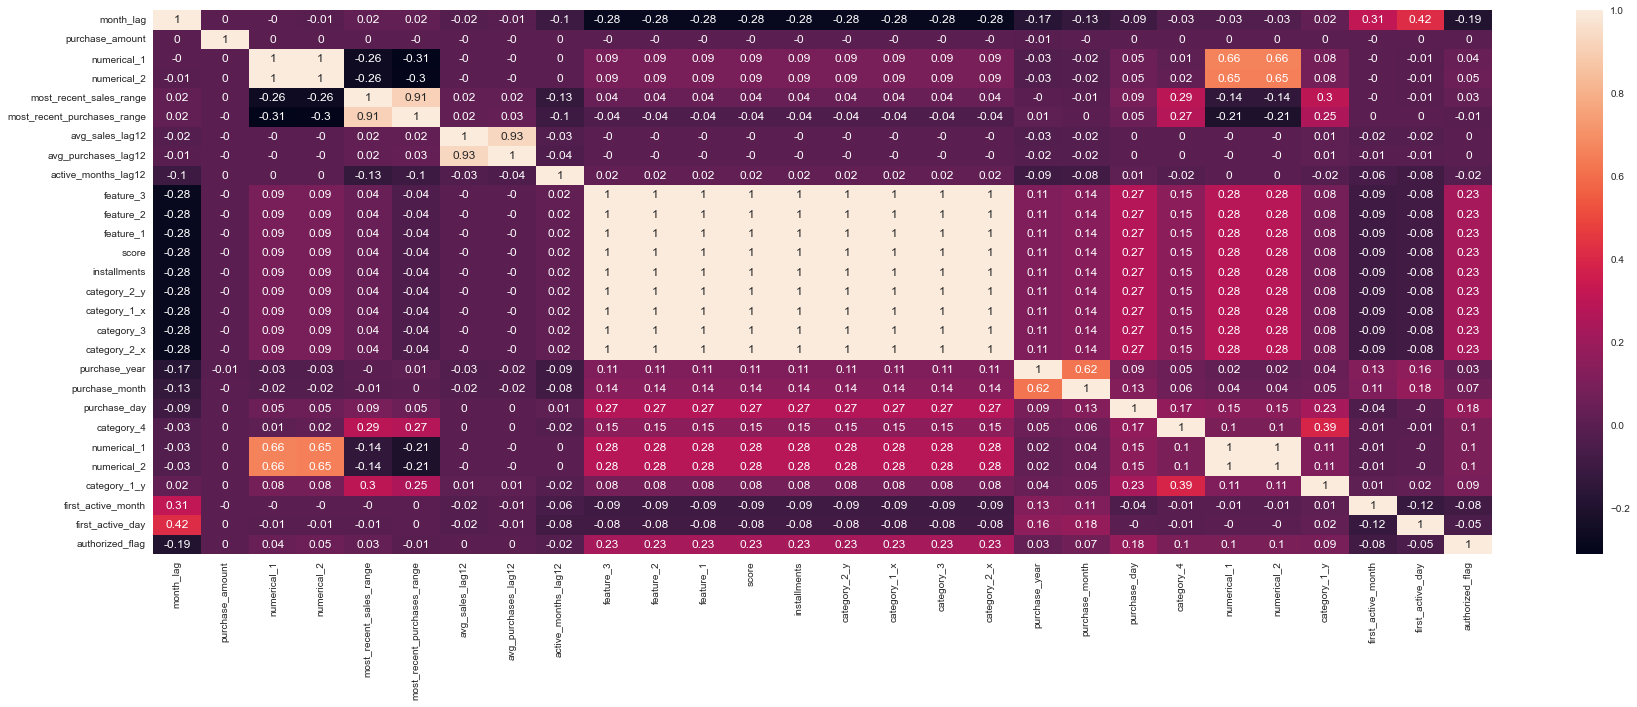

In [274]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = new_data.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

<Figure size 2160x720 with 0 Axes>

<AxesSubplot:>

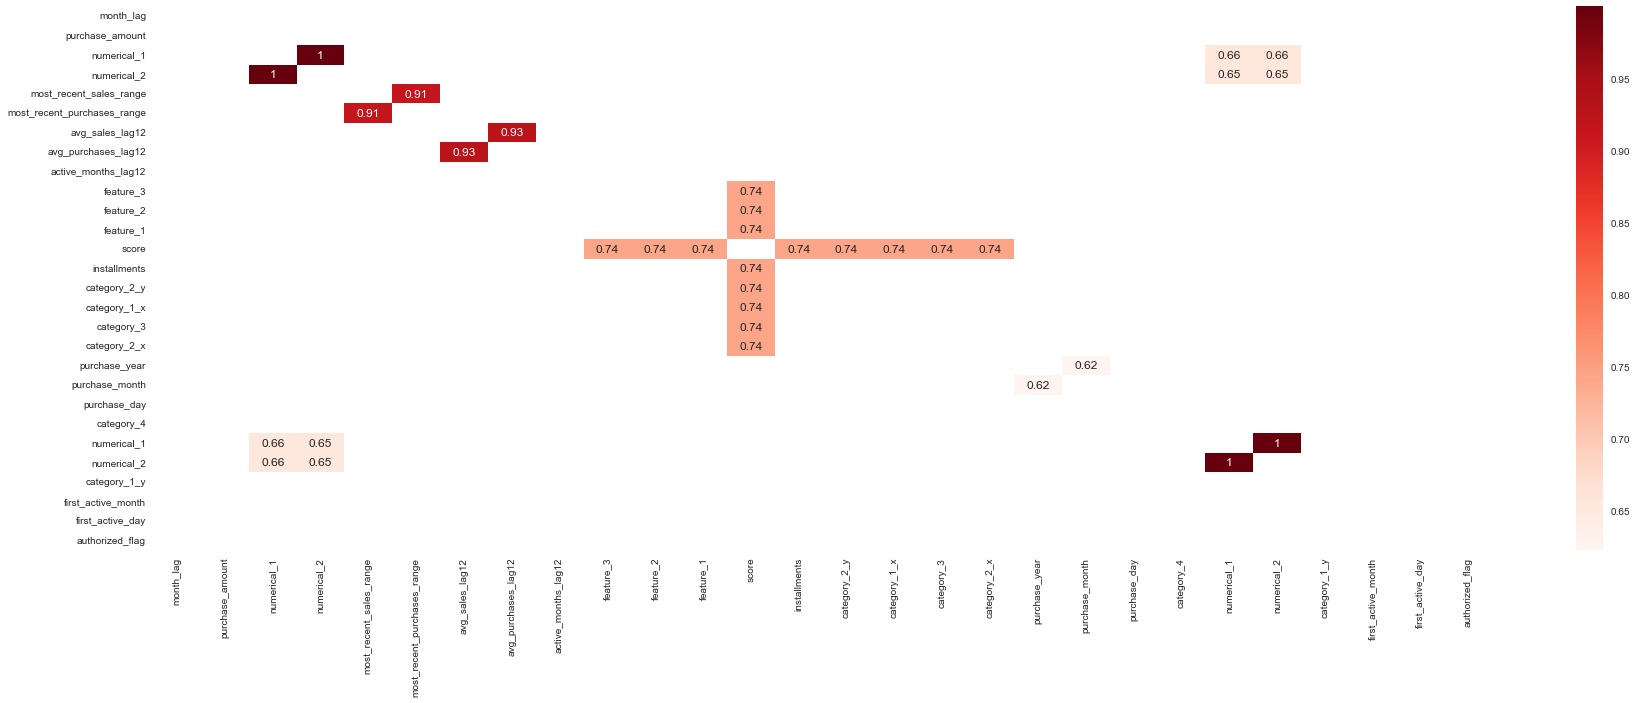

In [329]:
dfCorr = new_data.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [320]:
corr_matrix = new_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [327]:
#first element of sol series is the pair with the biggest correlation
sol.head()

installments  category_1_x   1.000
feature_3     installments   1.000
feature_2     category_2_y   1.000
              category_1_x   1.000
              category_3     1.000
dtype: float64

#### OBSERVATION:
* The features that hightly correlated are: 
  - installments  
  - category_3
  - category_2_y
  - category_1_x
  - feature_2
  - feature_3

### Chicking the normality of the data

#### Statistical Analysis Test

In [269]:
# Perform Shapiro-Wilk test on the score variable

stat, p = shapiro(new_data['score'])
print('Shapiro-Wilk test statistics:', stat)
print('p-value:', p)

# Interpret the test results
alpha = 0.05
if p > alpha:
    print('The score variable is normally distributed (fail to reject H0)')
else:
    print('The score variable is not normally distributed (reject H0)')

Shapiro-Wilk test statistics: 0.6961827874183655
p-value: 0.0
The score variable is not normally distributed (reject H0)


In [270]:
# Aonther way to perform statistical method.
# Perform D’Agostino-Pearson’s K² test on the score variable  

stat, p = normaltest(new_data['score'])
print('D’Agostino-Pearson’s K² test statistics:', stat)
print('p-value:', p)

# Interpret the test results
alpha = 0.05
if p > alpha:
    print('The score variable is normally distributed (fail to reject H0)')
else:
    print('The score variable is not normally distributed (reject H0)')

D’Agostino-Pearson’s K² test statistics: 147779.75361476775
p-value: 0.0
The SALE PRICE variable is not normally distributed (reject H0)


In [309]:
# Visualize and calculate the skewness
skewness = new_data.skew().sort_values(ascending=False)
skewness[abs(skewness) > 1]

purchase_amount       448.055
avg_sales_lag12        37.265
avg_purchases_lag12    33.587
numerical_2             3.712
numerical_1             3.682
category_2_y            3.293
feature_1               3.293
category_1_x            3.293
installments            3.293
score                   3.293
category_3              3.293
feature_2               3.293
feature_3               3.293
category_2_x            3.293
numerical_2             1.036
numerical_1             1.031
first_active_day       -1.898
authorized_flag        -1.898
purchase_year          -1.936
active_months_lag12    -2.450
category_4             -2.637
purchase_month         -3.146
purchase_day           -4.407
category_1_y           -7.451
dtype: float64

#### Graphical Test

C:\Users\lap1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


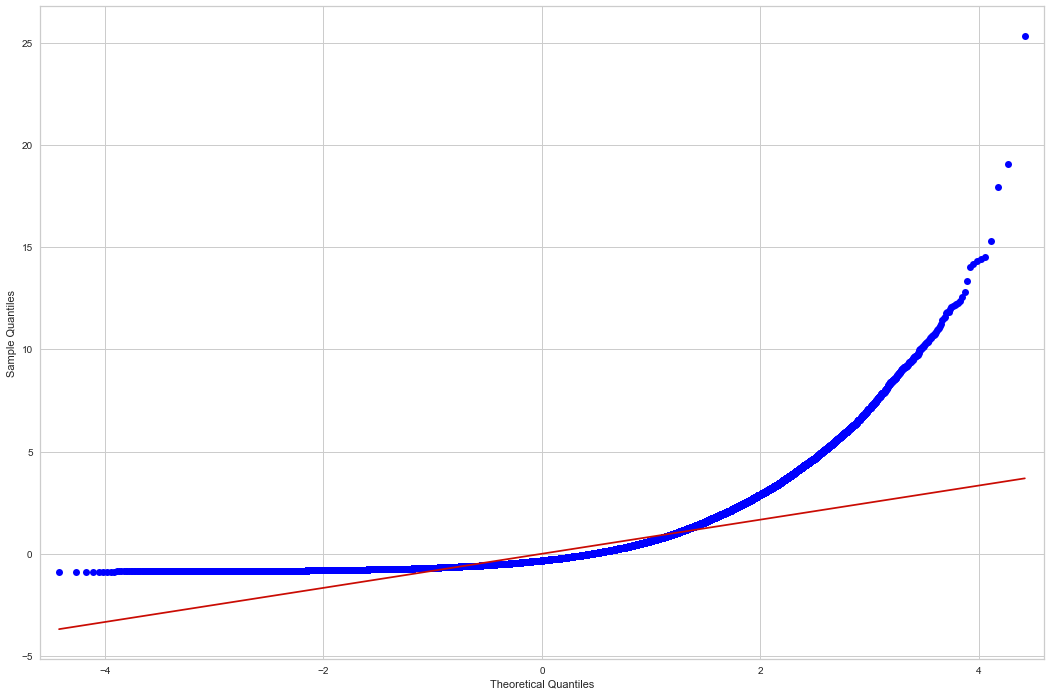

In [305]:
#create Q-Q plot with regression line added to plot
fig = sm.qqplot(new_data['score'], line='r', fit = True)
plt.show()

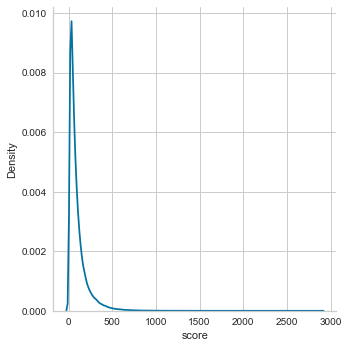

In [306]:
# Create Distribution plot 
sns.displot(data=new_data, x=new_data['score'], kind="kde")

C:\Users\lap1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


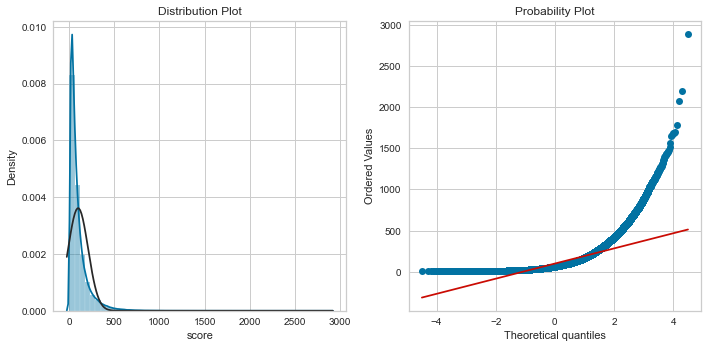

In [308]:
def normality_plot(X):
    """
    1. Draw distribution plot with normal distribution fitted curve
    2. Draw Quantile-Quantile plot 
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')
    #`probplot` generates a probability plot, which should not be confused with a Q-Q or a P-P plot.  Statsmodels has more extensive functionality of this type, see ``statsmodels.api.ProbPlot``
    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

normality_plot(new_data['score'])


#### OBSERVATION

* The data don't fit the normal distribution.
* So, we need to apply a transformer to fit the normal distribution such as we can log-transform.

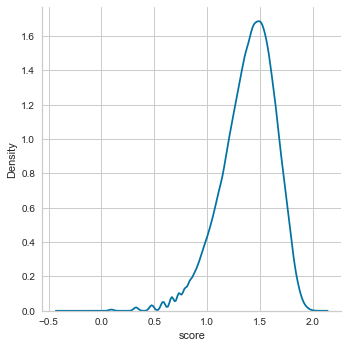

In [311]:
new_data['score'] = np.log(new_data['score'])
sns.displot(data=new_data, x=new_data['score'], kind="kde")

C:\Users\lap1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


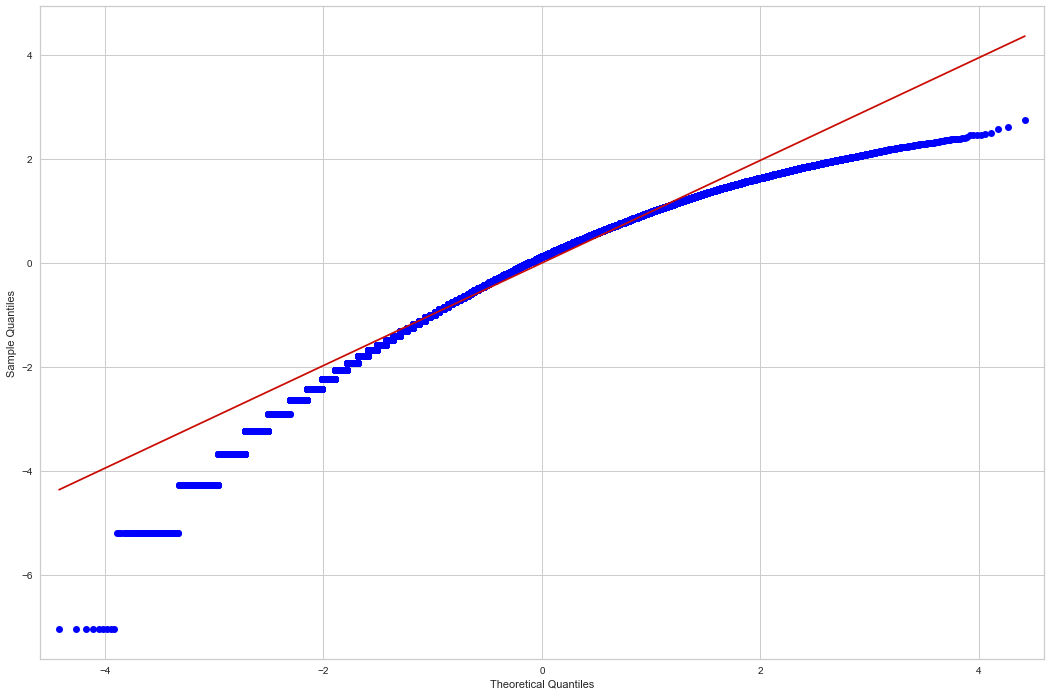

In [312]:
#create Q-Q plot with regression line added to plot
fig = sm.qqplot(new_data['score'], line='r', fit = True)
plt.show()

### Hypothesis test

In [333]:
# Hypothesis test 1: The active day in the month is before day 17

active_17 = new_data.loc[new_data['first_active_day'] < 17]['score']
not_active_17 = new_data.loc[new_data['first_active_day'] >= 17]['score']


stats.mannwhitneyu(x=active_17, y=not_active_17, alternative = 'two-sided')

print('Hypothesis test 1:')
print('Mann-Whitney U test statistics:', stat)
print('p-value:', p)

alpha = 0.05
if p > alpha:
    print("The null hypothesis (that the active day in the month is before day 17) can't be rejected (fail to reject H0)")
else:
    print('The null hypothesis(that the active day in the month is before day 17) can be rejected (reject H0)')
    

cliffs_delta(not_active_17, active_17)

MannwhitneyuResult(statistic=5386490003.0, pvalue=0.0)

Hypothesis test 1:
Mann-Whitney U test statistics: 147779.75361476775
p-value: 0.0
The null hypothesis(that the active day in the month is before day 17) can be rejected (reject H0)


(-0.15630544939953087, 'small')

In [334]:
# Hypothesis test 1: NYC real estate market change after COVID-19 declaration

sale_2 = new_data.loc[new_data['most_recent_sales_range'] < 2]['score']
not_sale_2 = new_data.loc[new_data['most_recent_sales_range'] >= 2]['score']


stats.mannwhitneyu(x=sale_2, y=not_sale_2, alternative = 'two-sided')

print('Hypothesis test 1:')
print('Mann-Whitney U test statistics:', stat)
print('p-value:', p)

alpha = 0.05
if p > alpha:
    print("The null hypothesis (that the most recent sales range is category 2) can't be rejected (fail to reject H0)")
else:
    print('The null hypothesis(that the most recent sales range is category 2) can be rejected (reject H0)')
    

cliffs_delta(not_sale_2, sale_2)

MannwhitneyuResult(statistic=3982163756.0, pvalue=4.556276376027872e-133)

Hypothesis test 1:
Mann-Whitney U test statistics: 147779.75361476775
p-value: 0.0
The null hypothesis(that the most recent sales range is category 2) can be rejected (reject H0)


(-0.0739517117810697, 'negligible')

## Splitting Data

In [313]:
X = new_data.loc[:, new_data.columns != 'score']
y = new_data.loc[:, 'score']

In [314]:
# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

In [315]:
# Splitting the data into train and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 1) 

### Create Rigression Model

In [316]:
# Create a Lasso regression model object and fit the model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_val)
lasso_rmse = np.sqrt(mean_squared_error(y_val, lasso_pred))

print("Lasso Regression RMSE: ", lasso_rmse)


Lasso()

Lasso Regression RMSE:  0.24912821442685013


## Answering Questions

### Q1: 
##### To use the merchants.csv, historical transactions.csv, and new merchant transactions.csv files for user loyalty prediction, we can perform the following steps:

  - Data Cleaning and Preprocessing: We need to clean and preprocess the data to ensure that the data is in a structured format, and there are no missing or incorrect values in the data.

  - Feature Engineering: We can extract new features from the provided data sets, such as the average transaction amount, the standard deviation of transaction amount, the total number of transactions, and the frequency of transactions. We can also create new features by combining the features from different datasets.

  - Joining the Datasets: We can join the historical transactions.csv and new merchant transactions.csv with the merchants.csv file to get additional information about the merchants, such as their category, city, and state. By joining these datasets, we can identify the most popular merchants for each credit card user, the user's purchasing behavior and preferences, and the user's geographic location.

  - Exploratory Data Analysis: We can perform exploratory data analysis to understand the distribution of features, identify outliers, and check for correlations between features. This will help us in selecting the relevant features for the model.
  
  - Model Evaluation: We can evaluate the performance of the model using metrics such as root mean squared error (RMSE), mean absolute error (MAE), and R-squared score. We can also use visualization techniques such as scatter plots and residual plots to check the model's performance visually.

  - Model Deployment: Once we have selected the best-performing model, we can use it to predict the loyalty scores for new credit card users based on their transaction history and merchant information.
  
  
  

### Q2:
* The quality of the dataset can significantly impact the accuracy and reliability of the machine learning models used for user loyalty analysis and prediction. Therefore, it is essential to evaluate the quality of the dataset before building models.

* In terms of missing values, we can observe that the historical transactions.csv and new merchant transactions.csv files contain missing values for some of the transaction-related attributes such as purchase amount, merchant category, and city. These missing values may affect the accuracy of the models and need to be handled appropriately.

* To assess the missing value patterns and mechanism, we can use exploratory data analysis techniques such as heatmaps and distribution plots. We can observe that the missing values in historical transactions.csv and new merchant transactions.csv are not randomly distributed but follow a specific pattern. For example, in avg_sales_lag12 and avg_sales_lag6 columns we can determine the missing value pattern as missing at random (MAR) 

* To handle the missing values, we can use techniques such as imputation, where we replace the missing values with a suitable estimate, or we can remove the rows or columns containing missing values. However, the choice of method depends upon the amount and pattern of missing data, as well as the specific attributes SUCH AS WE DO IN THE CODE ABOVE.

### Q3:
##### We can perform the following data cleaning steps to handle the missing values:

  - Identify the missing values in attributes using pandas DataFrame.isna() method.

  - Determine the number of missing values in each attribute using pandas DataFrame.isnull().sum() method.

  - Based on the number of missing values and the reason behind the missing values, decide whether to remove the rows or impute the missing values.

  - If the missing values are less than 5-10% of the total data for the attributes, we can consider imputing the missing values. We can use various imputation methods such as mean imputation, mode imputation, or regression imputation to replace the missing values.

  - If the missing values are more than 10%, we may need to remove the rows with missing values. However, before removing the rows, we need to ensure that the missing values are not related to other important features in the dataset.

  - After imputing or removing the missing values, we can check the distribution of the attributes using histograms or box plots to ensure that the data is consistent and there are no outliers.

  - Finally, we can update our dataframe to include the appropriate data cleaning steps for the Features.

### Q4:
##### Some important statistical tests are already performed on the dataset after preprocessing, which includes target user loyalty score:

* Mean, median, and mode of the target user loyalty score to understand the central tendency of the data.

* Skewness and kurtosis of the target user loyalty score to understand the shape of the distribution.

* Correlation matrix to identify the relationships between different features and the target user loyalty score.

* Descriptive statistics such as count, maximum, and quartiles for other important features in the dataset.

* Calculated Shapiro-Wilk test and D’Agostino-Pearson’s K² test.

### Q5:
###### Here are two hypothesis tests exploring information related to user loyalty score:

  ***Hypothesis Test 1:*** That the active day in the month is before day 17. So, The null hypothesis***(H0)*** is "the active day in the month is before day 17" and the alternative hypothesis***(H1)*** is that "the active day in the month is in day 17 or after".

   ***Hypothesis Test 2:***
    That the most recent sales range is category 2. So, the null hypothesis***(H0)*** is "the most recent sales range is category 2" and the alternative hypothesis***(H1)*** is "the most recent sales range is not category 2".

### Q6:
##### To create a regression model for user loyalty score prediction, we first need to select the appropriate features to include in the model. Based on the analysis in the previous questions, we can select the following features as mention before:

['purchase_year', 'purchase_month', 'purchase_day', 'category_4', 'category_1_y', 'first_active_month', 'first_active_day', 'authorized_flag', 'month_lag', 'purchase_amount', 'numerical_1', 'numerical_2', 'most_recent_sales_range', 'most_recent_purchases_range', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'purchase_date', 'feature_3', 'feature_2' ,'feature_1', 'score', 'installments', 'category_2_y', 'category_1_x', 'category_3']
* And also we used these features to train a regression model to predict the user loyalty score. Since the target variable is continuous, we can use a regression model to make predictions and here in this code we used Lasso regression.

### Q7: 
* Checking multicollinearity before fitting a regression model is very important to know which features we can select. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other, leading to unstable and unreliable estimates of the regression coefficients. To detect multicollinearity, we can calculate the correlation matrix among the selected features and check the correlation coefficients, AS MENTIONED ABOVE IN THE CODE.

### Q8: 
* To build a regression model for predicting user loyalty score, we can use the preprocessed data and the selected features as described in Q6. In addition, we used Lasso regression, which is a form of linear regression that uses L1 regularization to shrink the regression coefficients and perform feature selection.

* In the above code, we first load the preprocessed data into a pandas DataFrame and select the features and target variable. We then split the data into training and testing sets using the train_test_split() function from scikit-learn. We build a Lasso regression model with an alpha value of 1.0 and fit the model on the training data using the fit() method. We then make predictions on the training and testing data using the predict() method and evaluate the performance of the model using the root mean squared error (RMSE) metric that equals 0.24912821442685013.
